# Calculating Angles

In this lesson, you will learn:

1. Load the functions inside another juptyer notebook
2. Calculate angle of 3 given points
3. Calculate the hip and knee angle

<img src="./resource/calculating_angles_overview.png" width=300/>

## Load the functions we have written in the previous chapters

We can use `%run xxx.ipynb` to include the function in other jupyter notebook. This makes our notebook easier to read and less clumsy.

In [98]:
%run Squat_common_v2.ipynb

TF version: 2.10.0


### Try using the functions

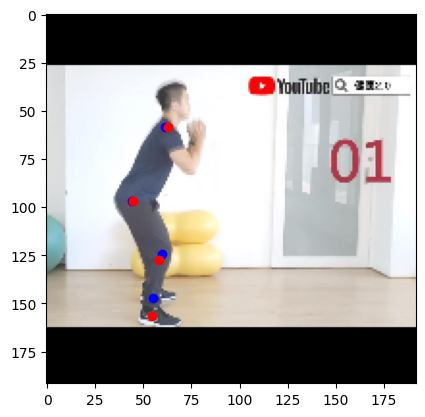

In [99]:
# image_path = 'resource/input_image.jpeg'
image_path = 'resource/input_image2.jpeg'
# image_path = 'resource/input_image3.jpeg'
# image_path = 'resource/input_image4.jpeg'

image = read_image(image_path)
movenet_image = convert_to_movenet_format(image)
movenet_output = movenet(movenet_image)
points = reoganize_output(movenet_output)
annotate_and_show(movenet_image[0], points)


In [100]:
points

{'left': {'shoulder': array([0.3031672 , 0.31955463, 0.8029834 ], dtype=float32),
  'hip': array([0.50391304, 0.22942382, 0.8029834 ], dtype=float32),
  'ankle': array([0.76611173, 0.28677976, 0.75382113], dtype=float32),
  'knee': array([0.6473029, 0.3113609, 0.700562 ], dtype=float32)},
 'right': {'shoulder': array([0.3031672 , 0.32774833, 0.75382113], dtype=float32),
  'hip': array([0.50391304, 0.23352069, 0.8029834 ], dtype=float32),
  'ankle': array([0.81527394, 0.28268293, 0.75382113], dtype=float32),
  'knee': array([0.6636903, 0.3031672, 0.8808236], dtype=float32)}}

## Function to calculate angle of 3 given points

<img src="./resource/calculating_angles_3points.png" width=300/>


In [101]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle > 180.0:
        angle = 360-angle
        
    return round(angle,2)

## Calculate the hip angle (Angle ABC)


<img src="./resource/calculating_angles_overview.png" width=200/>

In [102]:
def calculate_hip_joint_angle(points, keypoint_threshold = 0.2):     
    # get the position of keypoints from MoveNet output
    a1y, a1x, a1s = points['left']['shoulder']
    a2y, a2x, a2s = points['right']['shoulder']
    b1y, b1x, b1s = points['left']['hip']
    b2y, b2x, b2s = points['right']['hip']
    c1y, c1x, c1s = points['left']['knee']
    c2y, c2x, c2s = points['right']['knee']

    # calculate angle of left and right body respectively
    angle1 = calculate_angle( (a1y, a1x), (b1y, b1x), (c1y, c1x) )
    angle2 = calculate_angle( (a2y, a2x), (b2y, b2x), (c2y, c2x) )

    # return the midpoint of two angle
    return (angle1 + angle2) / 2
    

In [103]:
hip_angle = calculate_hip_joint_angle(points)
knee_angle = 0
print(hip_angle)

128.69


### Show the hip angle in the picture

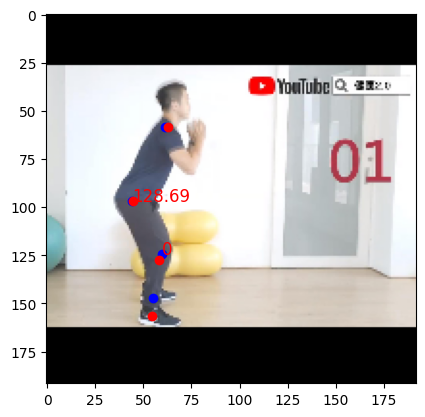

In [104]:
def annotate_and_show(image, points):

    height, width, _ = image.shape
    
    plt.imshow(image /255.0)
    
    for side in sides:
        for body_part in body_parts:            
            absolute_x = points[side][body_part][1] * width
            absolute_y = points[side][body_part][0] * height
            # print(f"{side}_{body_part}, x = {absolute_x} , y = {absolute_y}")
            if side == "left":
                plt.plot(absolute_x, absolute_y, 'bo')

                if body_part == "hip":
                    plt.text(absolute_x, absolute_y, hip_angle, fontsize=12, color='red')    

                if body_part == "knee":
                    plt.text(absolute_x, absolute_y, knee_angle, fontsize=12, color='red')    

            else:
                plt.plot(absolute_x, absolute_y, 'ro')
    
    plt.show()


annotate_and_show(movenet_image[0], points)

## Calculate the knee angle (Angle BCD)

<img src="./resource/calculating_angles_overview.png" width=300/>

### Exercise #1

Refer to the `calculate_hip_joint_angle` above, modify the program below to calculate the knee angle

In [105]:
def calculate_knee_joint_angle(points, keypoint_threshold = 0.2): 
    # get the position of keypoints from MoveNet output
    a1y, a1x, a1s = points['left']['shoulder']
    a2y, a2x, a2s = points['right']['shoulder']
    b1y, b1x, b1s = points['left']['hip']
    b2y, b2x, b2s = points['right']['hip']
    c1y, c1x, c1s = points['left']['knee']
    c2y, c2x, c2s = points['right']['knee']

    # calculate angle of left and right body respectively
    angle1 = calculate_angle( (a1y, a1x), (b1y, b1x), (c1y, c1x) )
    angle2 = calculate_angle( (a2y, a2x), (b2y, b2x), (c2y, c2x) )

    # return the midpoint of two angle
    return (angle1 + angle2) / 2
    

In [106]:
knee_angle = calculate_knee_joint_angle(points)
print(knee_angle)

128.69


#### Answer

In [107]:
def calculate_knee_joint_angle(points, keypoint_threshold = 0.2): 
    
    # points = points[0][0]
    
    # get the position of keypoints from MoveNet output
    a1y, a1x, a1s = points['left']['hip']
    a2y, a2x, a2s = points['right']['hip']
    b1y, b1x, b1s = points['left']['knee']
    b2y, b2x, b2s = points['right']['knee']
    c1y, c1x, c1s = points['left']['ankle']
    c2y, c2x, c2s = points['right']['ankle']

    # calculate angle of left and right body respectively
    angle1 = calculate_angle( (a1y, a1x), (b1y, b1x), (c1y, c1x) )
    angle2 = calculate_angle( (a2y, a2x), (b2y, b2x), (c2y, c2x) )

    # return the midpoint of two angle
    return (angle1 + angle2) / 2
    

In [108]:
knee_angle = calculate_knee_joint_angle(points)
print(knee_angle)

143.66


In [109]:
### Exercise 2: Show

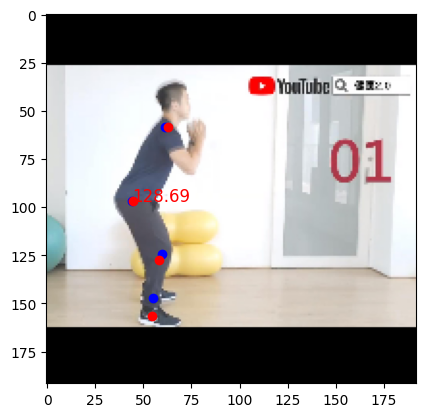

In [110]:
def annotate_and_show(image, points):

    height, width, _ = image.shape
    
    plt.imshow(image /255.0)
    
    for side in sides:
        for body_part in body_parts:            
            absolute_x = points[side][body_part][1] * width
            absolute_y = points[side][body_part][0] * height
            # print(f"{side}_{body_part}, x = {absolute_x} , y = {absolute_y}")
            if side == "left":
                plt.plot(absolute_x, absolute_y, 'bo')

                if body_part == "hip":
                    plt.text(absolute_x, absolute_y, hip_angle, fontsize=12, color='red')
                
            else:
                plt.plot(absolute_x, absolute_y, 'ro')
    
    plt.show()


annotate_and_show(movenet_image[0], points)

#### Answer

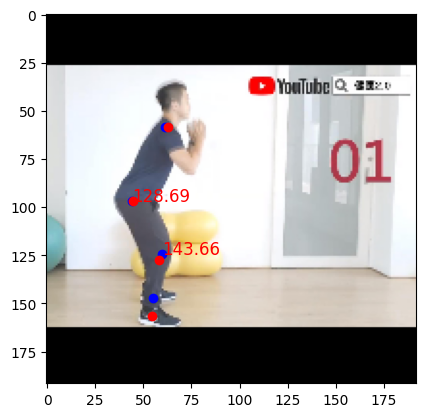

In [111]:
def annotate_and_show(image, points):

    height, width, _ = image.shape
    
    plt.imshow(image /255.0)
    
    for side in sides:
        for body_part in body_parts:            
            absolute_x = points[side][body_part][1] * width
            absolute_y = points[side][body_part][0] * height
            # print(f"{side}_{body_part}, x = {absolute_x} , y = {absolute_y}")
            if side == "left":
                plt.plot(absolute_x, absolute_y, 'bo')

                if body_part == "hip":
                    plt.text(absolute_x, absolute_y, hip_angle, fontsize=12, color='red')    

                if body_part == "knee":
                    plt.text(absolute_x, absolute_y, knee_angle, fontsize=12, color='red')    

            else:
                plt.plot(absolute_x, absolute_y, 'ro')
    
    plt.show()


annotate_and_show(movenet_image[0], points)